Nivell 1



- Exercici 1

La teva tasca és dissenyar i crear una taula anomenada "credit_card" que emmagatzemi detalls crucials sobre les targetes de crèdit. La nova taula ha de ser capaç d'identificar de manera única cada targeta i establir una relació adequada amb les altres dues taules ("transaction" i "company"). Després de crear la taula serà necessari que ingressis la informació del document denominat "dades_introduir_credit". Recorda mostrar el diagrama i realitzar una breu descripció d'aquest.

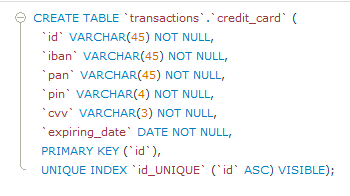

Cambio el tipo de dato de Expiring_date de DATE a Varchar(8)

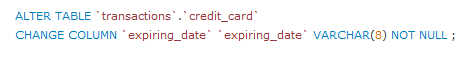

Para crear la relacion entre 2 tablas, creamos la FK en la tabla hija (transaction):

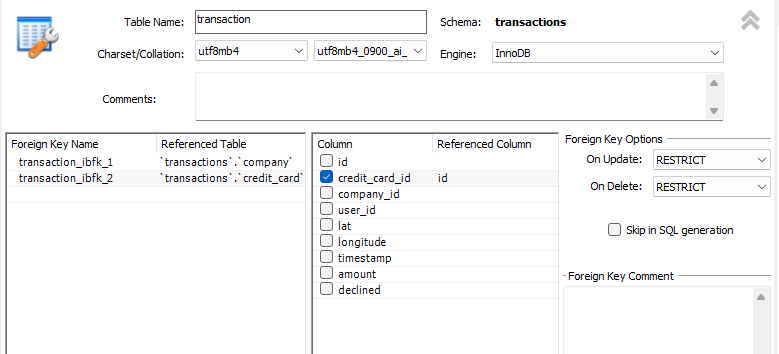

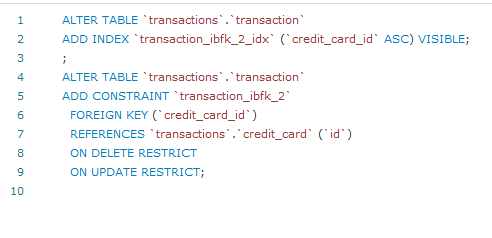

para modificar las tablas y así se puedan hacer cambios que afecten a tablas vinculadas cambio las opciones del FK a CASCADE tanto en Update como en Delete.

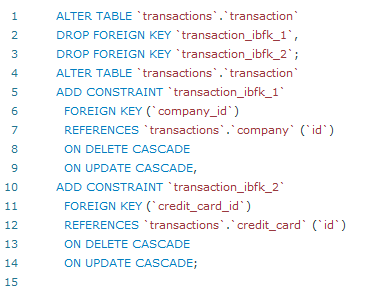

Cambio las caracteristicas de las columnas a NULL en vez de NOT null en las que no son PK.

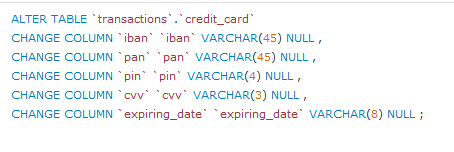

Y este es el modelo una vez creada la tabla y creada la relacion con la tabla transaction.

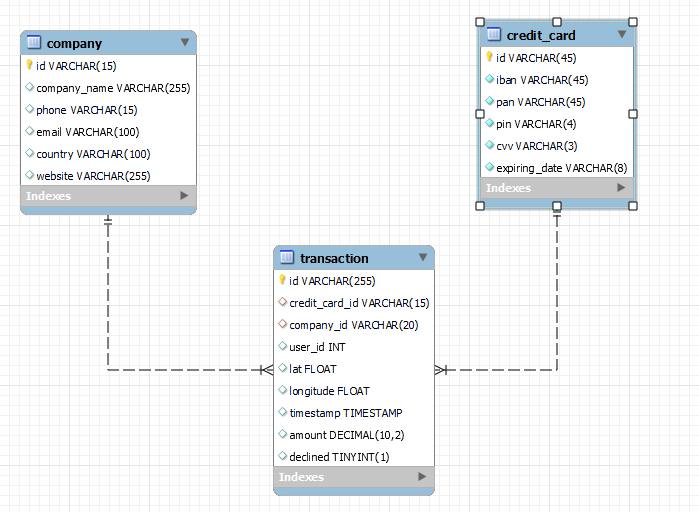

Este diagrama se puede tipificar como de estrella, habiendo una tabla de hechos (transaction) donde se encuentran todas las transacciones realizadas de compra con el id de la tarjeta bancaria, id de compañía, id de usuario, el momento en que se hace la transaccion, el importe. Esta tabla tiene una Primary Key que es la id.
Existen 2 tablas de Dimensiones: 
1)Compañia: con el combre empresa, telefono, mail, ciudad, web. Que se une con tabla Transaction a traves de id(commpany)-company id(transaction)FK en relacion 1 a N.
2)Credit card: con datos iban, pan, pin, cv y fecha de expiration. Que se une con tabla Transaction a traves de id(credit_card)- credit_card_id(transaction)FK en relacion 1 a N.


Exercici 2

El departament de Recursos Humans ha identificat un error en el número de compte de l'usuari amb ID CcU-2938. Es requereix actualitzar la informació ingressada en l'IBAN. La informació que ha de mostrar-se per a aquest registre és: R323456312213576817699999 . Recorda mostrar que el canvi es va realitzar.

```
UPDATE credit_card
SET iban ='R323456312213576817699999'
WHERE id = 'CcU-2938'
;

select *
from credit_card
where id= 'CcU-2938';
```
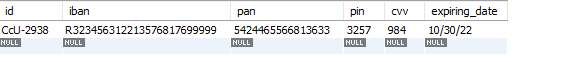


Exercici 3

En la taula "transaction" ingressa un nou usuari amb la següent informació:
Id 	108B1D1D-5B23-A76C-55EF-C568E49A99DD
credit_card_id 	CcU-9999
company_id 	b-9999
user_id 	9999
lat 	829.999
longitude 	-117.999
amount 	111.11
declined 	0

Dado que en las tablas madres no existen ni el credit_card_id ni el company_id, y no quiero romper la integridad de la BBDD,voy a insertar estos ID en cada una de las tablas madres, para luego poder hacer la insercion de este registro en la tabla hija.

```
INSERT INTO company(id, company_name, phone, email, country, website)
VALUES ( 'b-9999', NULL, NULL, NULL, NULL, NULL);
```

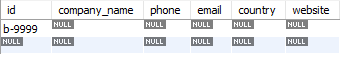

```
INSERT INTO credit_card(id, iban, pan, pin, cvv, expiring_date)
VALUES ( 'CcU-9999', NULL, NULL, NULL, NULL, NULL);
```
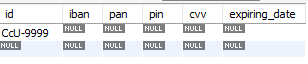

Ahora sí añado el registro solicitado:

```
INSERT INTO transaction(id, credit_card_id, company_id, user_id, lat, longitude, timestamp, amount, declined)
VALUES ( '108B1D1D-5B23-A76C-55EF-C568E49A99DD', 'CcU-9999', 'b-9999','9999', 829.999, -117.999, NULL, 111.11, 0);
```

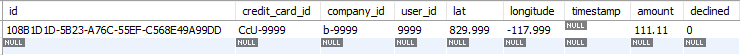




Exercici 4

Des de recursos humans et sol·liciten eliminar la columna "pan" de la taula credit_*card. Recorda mostrar el canvi realitzat.

```
ALTER TABLE credit_card DROP COLUMN pan;
```
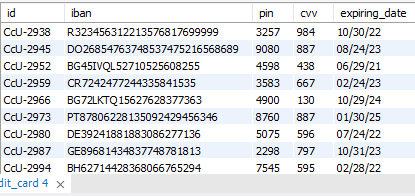


Nivell 2


Exercici 1

Elimina de la taula transaction el registre amb ID 02C6201E-D90A-1859-B4EE-88D2986D3B02 de la base de dades.

```
DELETE FROM transaction WHERE id='02C6201E-D90A-1859-B4EE-88D2986D3B02';
```
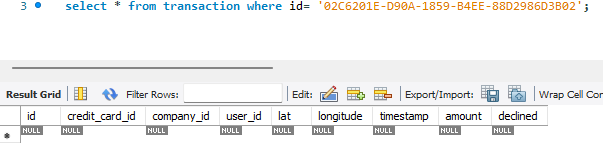


Exercici 2

La secció de màrqueting desitja tenir accés a informació específica per a realitzar anàlisi i estratègies efectives. S'ha sol·licitat crear una vista que proporcioni detalls clau sobre les companyies i les seves transaccions. Serà necessària que creïs una vista anomenada VistaMarketing que contingui la següent informació: Nom de la companyia. Telèfon de contacte. País de residència. Mitjana de compra realitzat per cada companyia. Presenta la vista creada, ordenant les dades de major a menor mitjana de compra.

```
CREATE VIEW `vistamarketing` AS
SELECT company_name as Nombre, phone as Telefono, country as PaisResidencia, AVG(amount) as CompraMedia
FROM COMPANY
INNER JOIN transaction
on company.id = transaction.company_id
GROUP BY Company_name, phone, country
ORDER BY AVG(amount) DESC;
```


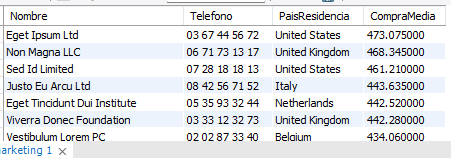






Exercici 3

Filtra la vista VistaMarketing per a mostrar només les companyies que tenen el seu país de residència en "Germany"

```
SELECT * FROM vistamarketing
WHERE PaisResidencia = 'Germany';
```
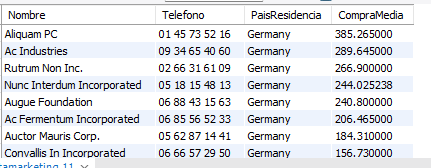




Nivel 3

Exercici 1

La setmana vinent tindràs una nova reunió amb els gerents de màrqueting. Un company del teu equip va realitzar modificacions en la base de dades, però no recorda com les va realitzar. Et demana que l'ajudis a deixar els comandos executats per a obtenir el següent diagrama: 
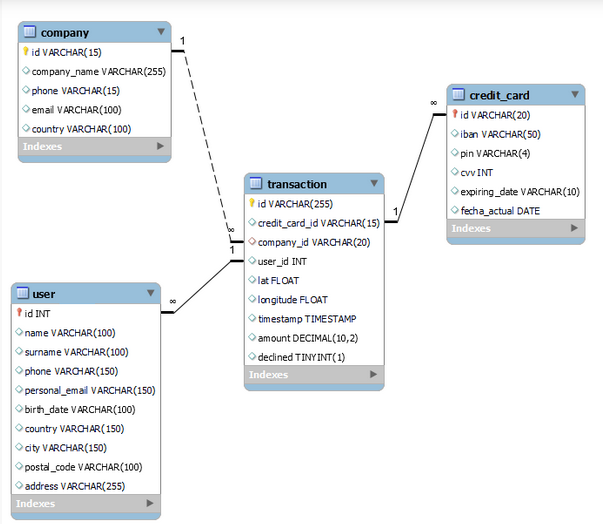

Cargo el fichero estructura_datos_user: hay dos queries. ejecutar las dos. La primera crea el indice, la segunda crea la estructura de la tabla.

 Segundo cargo el contenido de la tabla.


Tabla company elimino columna website.
```
ALTER TABLE company DROP website;
```

Modificar el largo de una primarykey: 
eliminar restriccion
```
ALTER TABLE transaction
DROP FOREIGN KEY transaction_ibfk_2;
```

Modificar el largo del tipo de la columna
```
ALTER TABLE credit_card
MODIFY ID VARCHAR(20);
```

Agregar la restriccion de nuevo
```
ALTER TABLE transaction
ADD CONSTRAINT transaction_ibfk_2
FOREIGN KEY (credit_card_id)
REFERENCES credit_card(id);
```

Modificar largo y tipos de campos que no son primarikey:
```
ALTER TABLE credit_card
MODIFY iban VARCHAR(50), 
MODIFY expiring_date VARCHAR(10),
MODIFY cvv INT;
```

Añadir una nueva columma, en este caso en credit_card fecha_actual
```
ALTER TABLE credit_card
ADD fecha_actual DATE;
```

Modificar el nombre de un campo, en este aso en tabla user, email por personal_email.
```
ALTER TABLE user
CHANGE email personal_email VARCHAR(150);
```

Diagrama final

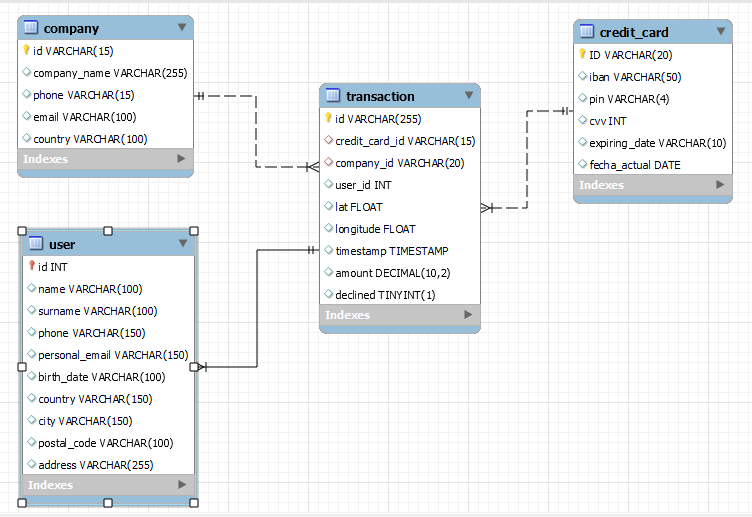




Exercici 2

L'empresa també et sol·licita crear una vista anomenada "InformeTecnico" que contingui la següent informació:

    ID de la transacció
    Nom de l'usuari/ària
    Cognom de l'usuari/ària
    IBAN de la targeta de crèdit usada.
    Nom de la companyia de la transacció realitzada.
    Assegura't d'incloure informació rellevant de totes dues taules i utilitza àlies per a canviar de nom columnes segons sigui necessari.

Mostra els resultats de la vista, ordena els resultats de manera descendent en funció de la variable ID de transaction.

```
CREATE VIEW InformeTecnico AS
SELECT transaction.id, 
user.name as Nom,
user.surname as Cognom,
credit_card.iban as IBAN,
company.company_name as Nom_companyia,
transaction.amount as Import
FROM transaction
JOIN user
ON transaction.user_id=user.id
JOIN credit_card
ON transaction.credit_card_id=credit_card.id
JOIN company
ON transaction.company_id= company.id
ORDER BY transaction.id DESC;
```

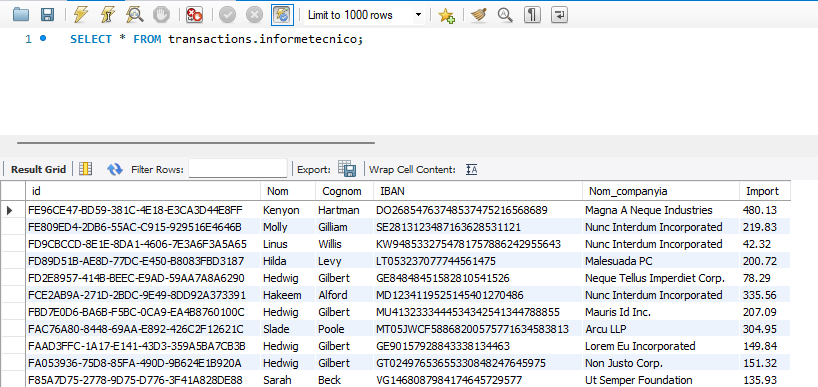
